# Programming Exercise - Multi-class Classification and Neural Network

In [100]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LogisticRegression

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## Load data

In [101]:
data = loadmat('data/ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [102]:
weights = loadmat('data/ex3weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [103]:
y = data['y']

# add constant dor intercept
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]

print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 401) (with intercept)
y: (5000, 1)


In [104]:
theta1, theta2 = weights['Theta1'], weights['Theta2']

print('theta1: {}'.format(theta1.shape))
print('theta2: {}'.format(theta2.shape))

theta1: (25, 401)
theta2: (10, 26)


(-0.5, 399.5, 19.5, -0.5)

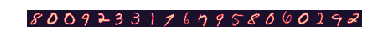

In [105]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off')

## Multiclass Classification

### Logistics regression hypothesis

In [106]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [107]:
# Cost function regularized
def cost_function_regularized(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [108]:
# Gradient regularized
def gradient_regularized(theta, reg, X,y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

#### One-vs-all classification

In [116]:
def one_vs_all(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
    all_theta = np.zeros((n_labels, X.shape[1])) #10x401

    for c in np.arange(1, n_labels+1):
        res = minimize(cost_function_regularized, initial_theta, args=(reg, features, (classes == c)*1), method=None,
                       jac=gradient_regularized, options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [117]:
theta = one_vs_all(X, y, 10, 0.1)

#### One-vs-all Predict

In [118]:
def predict_OneVsAll(all_theta, features):
    probs = sigmoid(X.dot(all_theta.T))
        
    return(np.argmax(probs, axis=1)+1)

In [ ]:
pred = predict_OneVsAll(theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 93.24 %


#### Multiclass Logistic Regression with scikit-learn

In [ ]:
clf = LogisticRegression(C=10, penalty='l2', solver='liblinear')
clf.fit(X[:, 1:], y.ravel())

In [ ]:
predict_2 = clf.predict(X[:,1:])
print('Training set accuracy: {} %'.format(np.mean(predict_2 == y.ravel())*100))

## Neural network

In [ ]:
def predict(theta_1, theta_2, features):
    z2 = theta_1.dot(features.T)
    a2 = np.c_[np.ones((data['X'].shape[0], 1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta_2.T)
    a3 = sigmoid(z3)
    return np.argmax(a3, axis=1)+1

In [ ]:
pred = predict(theta1, theta2, X)
print("Training set accuracy:  {}%".format(np.mean(pred == y.ravel())*100))